In [1]:
# Inport Libraries

import pandas as pd
import numpy as np
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import confusion_matrix
import seaborn as sns
pd.options.plotting.backend = 'plotly'

df = pd.read_csv("Merged_dataset.csv")

Jasper can you hear me

Can we make a really cool plot on our dataset

hahahah I saw what you did there

Why don't you show off your coding skills with a really cool plot  on the merged dataset

I sent some in the discord channel


Did you have a look at it?


<AxesSubplot:>

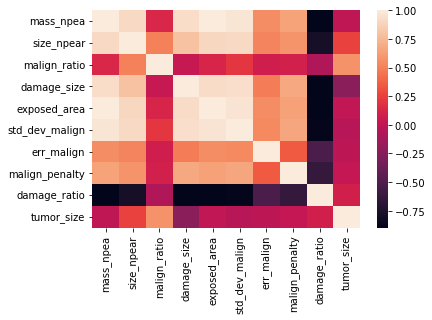

In [16]:
sns.color_palette("viridis")
sns.heatmap(df.corr())

In [28]:
dim = []
colMax = df.loc[df['malign_ratio'].idxmax()]
for i in df['malign_ratio']:
    i /= colMax
colMax = df.loc[df['damage_size'].idxmax()]
for i in df['malign_ratio']:
    i = i*255/colMax
print(df.loc[df['malign_ratio'].idxmax()])
for i in df:
    if i != 'tumor_size' and i != 'malign_ratio' and i != 'damage_ratio':
        dim.append(i)
fig = px.scatter_matrix(df,dimensions=dim,color='malign_ratio',size='damage_ratio',opacity=0.25,width=120,height=120,title="Scatter Matrix of Melanoma Tumors",labels={col:col.replace('_', ' ') for col in df.columns})
fig.update_traces(diagonal_visible=False)
fig.show()

mass_npea         8.279980e+03
size_npear        4.783270e+03
malign_ratio      5.776900e-01
damage_size       8.912800e+01
exposed_area      1.049581e+06
std_dev_malign    1.622040e+02
err_malign        2.249190e+03
malign_penalty    8.700000e+01
damage_ratio      4.056350e+01
tumor_size        1.498610e+01
Name: 10567, dtype: float64


In [2]:
# Clean Data

df.dropna(axis=1, inplace=True)
df = df.reset_index(drop=True)
target = df['tumor_size']
input_columns = df.loc[:, df.columns != 'tumor_size']
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, train_size=0.8)

In [3]:
# Make model object || We're using a classification AI in a regression problem

mlModel = KNN(n_neighbors=7)

In [4]:
# Fit Model

mlModel.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [5]:
# Use Model || Oh no. That's percent of guesses correct or close

y_hat = mlModel.predict(x_test)
print(np.mean(np.abs((y_hat - y_test)/y_hat))*100) # <- Just use this. It

39.04809436039875


Jasper can you hear me

In [6]:
total_squared_error = (np.sum((y_test - y_hat)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

NameError: name 'total_squared_error' is not defined